---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

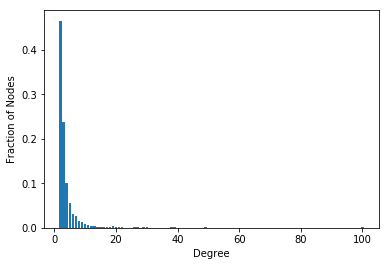

In [3]:
import matplotlib.pyplot as plt
G=P1_Graphs[0]
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

0.5642419635919628
5.089871871871872


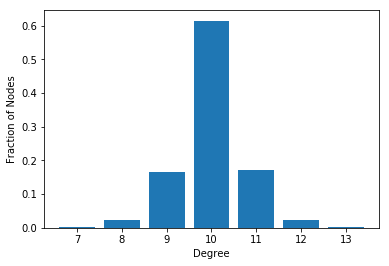

In [4]:
G=P1_Graphs[1]
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
print(nx.average_clustering(G))
print (nx.average_shortest_path_length(G))
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

0.4018222222222227
9.378702269692925


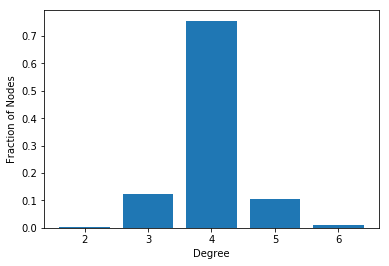

In [5]:
G=P1_Graphs[2]
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
print(nx.average_clustering(G))
print (nx.average_shortest_path_length(G))
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

0.03780379975223251
3.1048046283934134


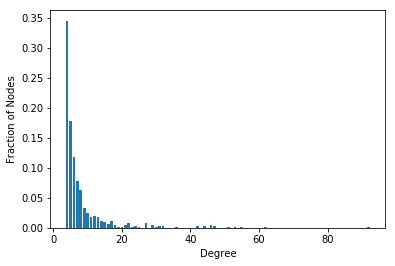

In [6]:
G=P1_Graphs[3]
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
print(nx.average_clustering(G))
print (nx.average_shortest_path_length(G))
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

0.0033037037037037037
5.0785509568313305


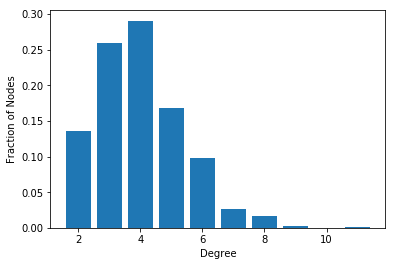

In [7]:
G=P1_Graphs[4]
degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
print(nx.average_clustering(G))
print (nx.average_shortest_path_length(G))
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In [8]:
def graph_identification():
   
    return ['PA','SW_L','SW_L','PA','SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [9]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))
print(G.is_directed())

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
False


In [10]:
G.nodes(data=True)[:10]

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (2, {'Department': 21, 'ManagementSalary': nan}),
 (3, {'Department': 21, 'ManagementSalary': 1.0}),
 (4, {'Department': 21, 'ManagementSalary': 1.0}),
 (5, {'Department': 25, 'ManagementSalary': nan}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (7, {'Department': 14, 'ManagementSalary': 0.0}),
 (8, {'Department': 14, 'ManagementSalary': nan}),
 (9, {'Department': 14, 'ManagementSalary': 0.0})]

In [11]:
from collections import Counter
global depart
depart=Counter([str(a[1]['Department']) for a in G.nodes(data=True)])

### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [12]:
ans=[]
page_rank=nx.pagerank(G, alpha=0.9)
deg_cent=nx.degree_centrality(G)
close_cent=nx.closeness_centrality(G,normalized=True)
btw_cent=nx.betweenness_centrality(G, normalized=True,endpoints=False)
for i in range(1005):
    temp=[]
    temp.append(page_rank[i])
    temp.append(deg_cent[i])
    temp.append(close_cent[i])
    temp.append(btw_cent[i])
    temp.append(G.node[i]["ManagementSalary"])
    ans.append(temp)

In [13]:
temp=pd.DataFrame(ans)
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
train=temp[~temp[temp.columns[-1]].isnull()]
Xtrain, Xtest, ytrain, ytest = train_test_split(train[temp.columns[:-1]], train[temp.columns[-1]],random_state=0,test_size=0.1,stratify=train[temp.columns[-1]])
model = RandomForestClassifier(n_estimators=1000,max_depth=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

from sklearn.metrics import roc_auc_score

train_auc=roc_auc_score(model.predict(Xtrain), ytrain)
print(train_auc)

test_auc=roc_auc_score(ytest, ypred)
print(test_auc)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.995652173913
0.7421875


In [14]:
model = RandomForestClassifier(n_estimators=1000,max_depth=10)
model.fit(train[temp.columns[:-1]], train[temp.columns[-1]])
pre=temp[temp[temp.columns[-1]].isnull()][temp.columns[:-1]]
final_label=model.predict(pre)
final_prob=model.predict_proba(pre)[:,1]
pre["label"]=final_label
pre["prob"]=final_prob

In [15]:
def salary_predictions():
    pre['prob']

In [16]:
pre['prob'][:20]

1     0.101448
2     0.994000
5     1.000000
8     0.204007
14    0.233396
18    0.381343
27    0.178563
30    0.217731
31    0.472376
34    0.033579
37    0.071113
40    0.177265
45    0.050746
54    0.293476
55    0.126182
60    0.070729
62    1.000000
65    0.993000
77    0.059333
79    0.243779
Name: prob, dtype: float64

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [17]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


In [18]:
a1=list(nx.jaccard_coefficient(G))
a1_dict=dict()
for i in a1:
    a1_dict[i[:2]]=i[2]
a2=list(nx.resource_allocation_index(G))
a2_dict=dict()
for i in a2:
    a2_dict[i[:2]]=i[2]
a3=list(nx.adamic_adar_index(G))
a3_dict=dict()
for i in a3:
    a3_dict[i[:2]]=i[2]
a4=list(nx.preferential_attachment(G))
a4_dict=dict()
for i in a4:
    a4_dict[i[:2]]=i[2]
future_connections["a1"]=""
future_connections["a2"]=""
future_connections["a3"]=""
future_connections["a4"]=""
a11=[]
a22=[]
a33=[]
a44=[]
for i in range(len(future_connections)):
    curr=future_connections.index[i]
    a11.append(a1_dict[curr])
    a22.append(a2_dict[curr])
    a33.append(a3_dict[curr])
    a44.append(a4_dict[curr])
future_connections["a1"]=a11
future_connections["a2"]=a22
future_connections["a3"]=a33
future_connections["a4"]=a44
train=future_connections[~future_connections["Future Connection"].isnull()]
model = RandomForestClassifier(n_estimators=100,max_depth=6)
model.fit(train[train.columns[1:]], train[train.columns[0]])
pre=future_connections[future_connections["Future Connection"].isnull()][train.columns[1:]]
final_label=model.predict(pre)
final_prob=model.predict_proba(pre)[:,1]
pre["label"]=final_label
pre["prob"]=final_prob

In [19]:
def new_connections_predictions():
    
     return pre['prob']

In [20]:
pre['prob'][:20]

(107, 348)    0.033304
(542, 751)    0.012735
(20, 426)     0.539539
(50, 989)     0.012735
(942, 986)    0.012735
(324, 857)    0.012735
(13, 710)     0.154308
(19, 271)     0.143397
(319, 878)    0.012735
(659, 707)    0.012735
(49, 843)     0.012735
(208, 893)    0.012735
(377, 469)    0.013258
(405, 999)    0.020905
(129, 740)    0.014360
(292, 618)    0.055780
(239, 689)    0.012735
(359, 373)    0.013348
(53, 523)     0.030459
(276, 984)    0.012735
Name: prob, dtype: float64